# Health Insurance Repository Regression
* I will try to find out the charges pair non smokers

# Pesticide Repository Classification

* The data that I choose as my main project is of the classification type.

In [374]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.dummy import DummyRegressor

%matplotlib inline

In [375]:
df = pd.read_csv('data/Health_insurance.csv', ',')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


I will predict the medical expanses:

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [377]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


I chose to take only the non smokers from the data because I want to explore only on them.

In [378]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [379]:
smoker_dis = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'grey'], 
                   title='Annual Medical Charges')
smoker_dis.update_layout(bargap=0.1)
smoker_dis.show()

In [380]:
non_smoker_df = df[df['smoker']=='no']
non_smoker_df = non_smoker_df.drop(['smoker'],axis=1)
non_smoker_df

,age,sex,bmi,children,region,charges
1,18,male,33.770,1,southeast,1725.55230
2,28,male,33.000,3,southeast,4449.46200
3,33,male,22.705,0,northwest,21984.47061
4,32,male,28.880,0,northwest,3866.85520
5,31,female,25.740,0,southeast,3756.62160
...,...,...,...,...,...,...
1332,52,female,44.700,3,southwest,11411.68500
1333,50,male,30.970,3,northwest,10600.54830
1334,18,female,31.920,0,northeast,2205.98080
1335,18,female,36.850,0,southeast,1629.83350


We will show all the columns in graph so it will be easy to see the distribution

In [381]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

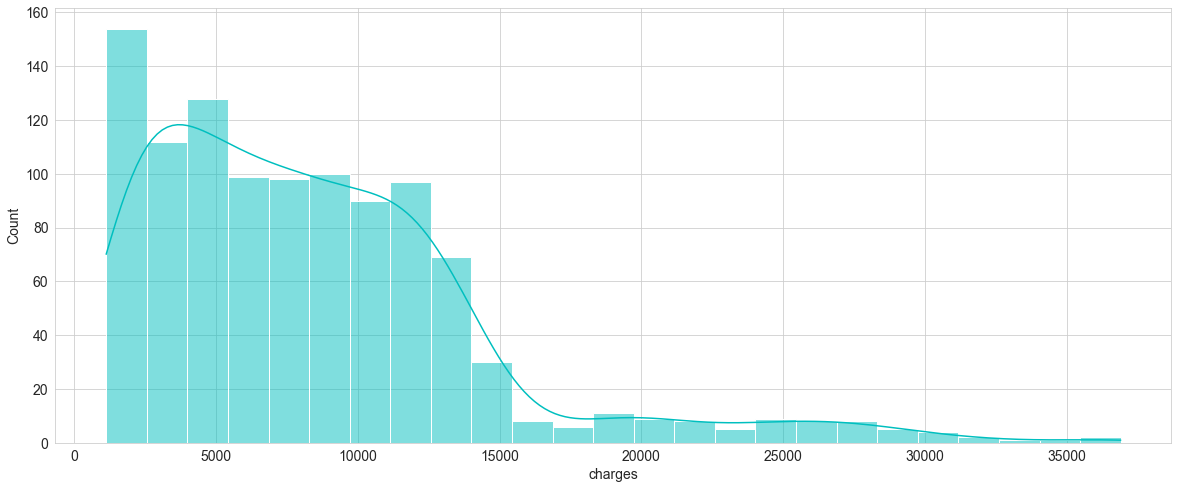

In [382]:
sns.set_style(style='whitegrid')
plt.subplots(1, 1, figsize=(20,8))
sns.histplot(x= 'charges',kde= True, data= non_smoker_df, color='c')
plt.show()

In [383]:
age_dis = px.histogram(non_smoker_df, 
    x='age', 
    marginal='box', 
    nbins=47, 
    title='Distribution of Age')
age_dis.update_layout(bargap=0.1)
age_dis.show()

In [384]:
BMI_dis = px.histogram(non_smoker_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
BMI_dis.update_layout(bargap=0.1)
BMI_dis.show()

In [385]:
sex_dis = px.histogram(non_smoker_df,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["purple","red"],
                   title = 'Different charges over genders'
               
)
sex_dis.update_layout(bargap=0.1)
sex_dis.show()

In [386]:
all_dis = px.histogram(non_smoker_df,
                  x = "charges",
                  marginal = 'box', 
                  color="region",
                  title = "charges over different regions of U.S.A")
all_dis.update_layout(bargap=0.1)
all_dis.show()

In [387]:
all_dis = px.histogram(non_smoker_df, 
    x = 'charges',
    marginal ="box",
    color = 'children',
    title = 'charges incurred by children')
all_dis.update_layout(bargap=0.1)
all_dis.show()

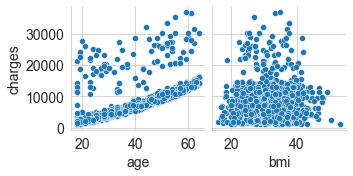

In [388]:
sns.pairplot(non_smoker_df, 
    x_vars = ['age', 'bmi'],
    y_vars = ['charges'],
    # title='BMI vs. Charges'
    )

In [389]:
px.violin(non_smoker_df,x = 'children',y = 'charges')


In [390]:
px.histogram(non_smoker_df,x='sex',y = 'charges',color = 'region')

In [391]:
df.charges.corr(df.age)

0.2990081933306476

In [392]:
df.charges.corr(df.bmi)

0.1983409688336288

In [393]:
df.children.corr(df.charges)

0.06799822684790471

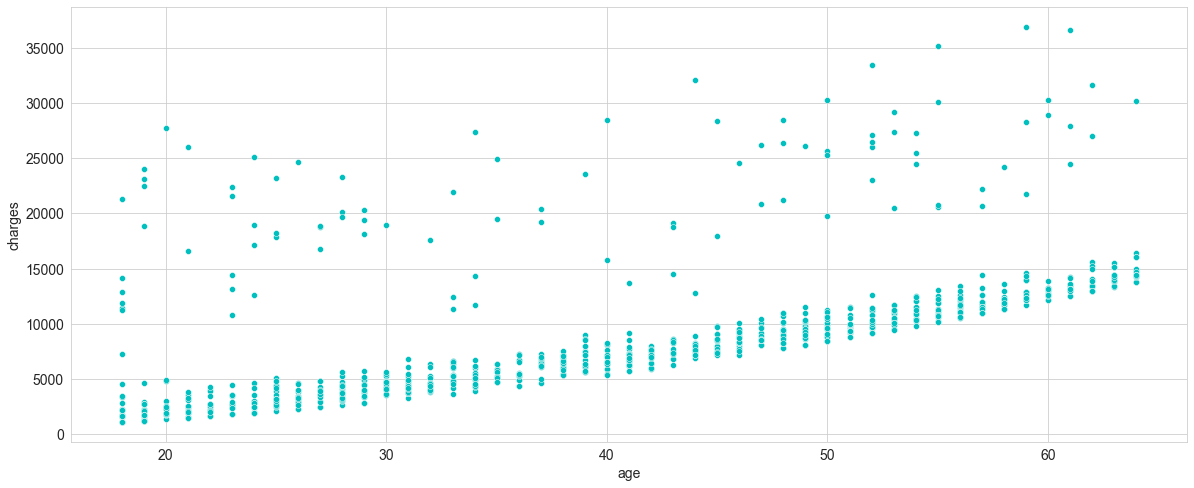

In [394]:
plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x='age',y='charges',data=non_smoker_df,color='c')
plt.show()

So the good data is when the charges is under 17000.

I will try to find the difference charges between the ages:

In [395]:
young_adults=non_smoker_df[(non_smoker_df['age']>=18) & (non_smoker_df['age']<30)]
adults=non_smoker_df[(non_smoker_df['age']>=30) & (non_smoker_df['age']<=45)]
old_adults=non_smoker_df[non_smoker_df['age']>45]

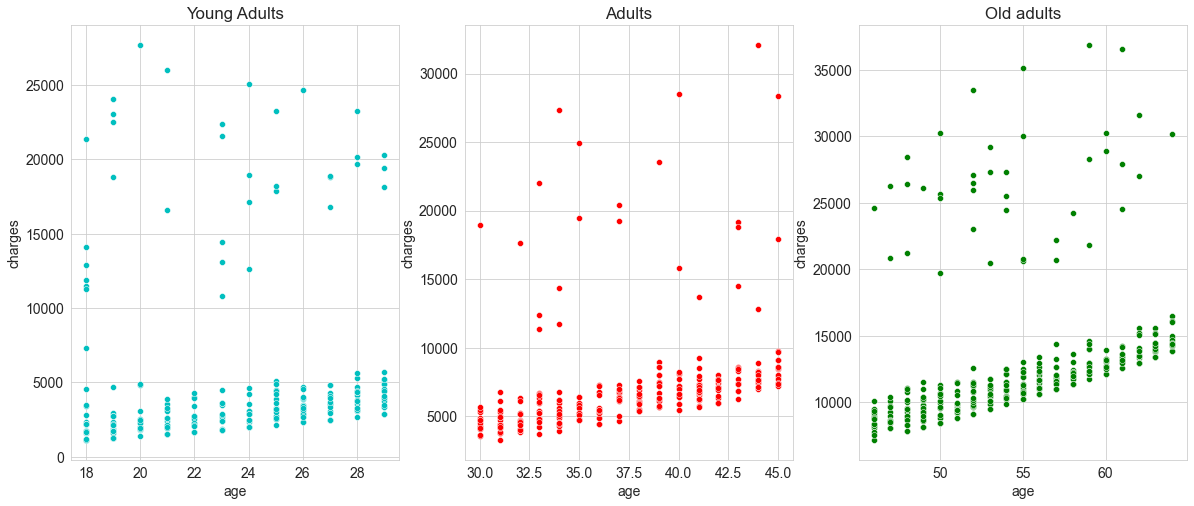

In [396]:
fig,(young, adoult, old)=plt.subplots(1,3,figsize=(20,8))

young.set_title('Young Adults')
sns.scatterplot(x='age',y='charges',data=young_adults,ax=young,color='c')

adoult.set_title('Adults')
sns.scatterplot(x='age',y='charges',data=adults,ax=adoult,color='r')

old.set_title('Old adults')
sns.scatterplot(x='age',y='charges',data=old_adults,ax=old,color='g')

plt.show()


For young adults the good charges are under 7000.

For adults the good charges are under 10000.

For old adults the good charges are under 16000.

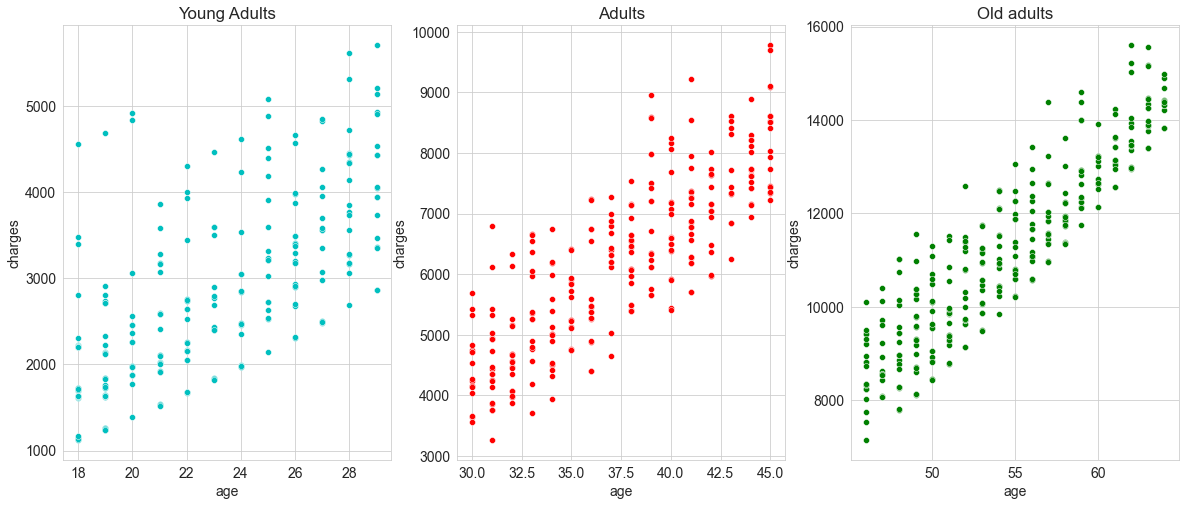

In [397]:
fig,(young, adult, old)=plt.subplots(1,3,figsize=(20,8))
young_adults = young_adults[young_adults['charges']<7000]
adults = adults[adults['charges']<10000]
old_adults = old_adults[old_adults['charges']<16000]
young.set_title('Young Adults')
sns.scatterplot(x='age',y='charges',data=young_adults,ax=young,color='c')

adult.set_title('Adults')
sns.scatterplot(x='age',y='charges',data=adults,ax=adult,color='r')

old.set_title('Old adults')
sns.scatterplot(x='age',y='charges',data=old_adults,ax=old,color='g')

plt.show()


In [398]:
new_df=pd.concat([young_adults,adults,old_adults])

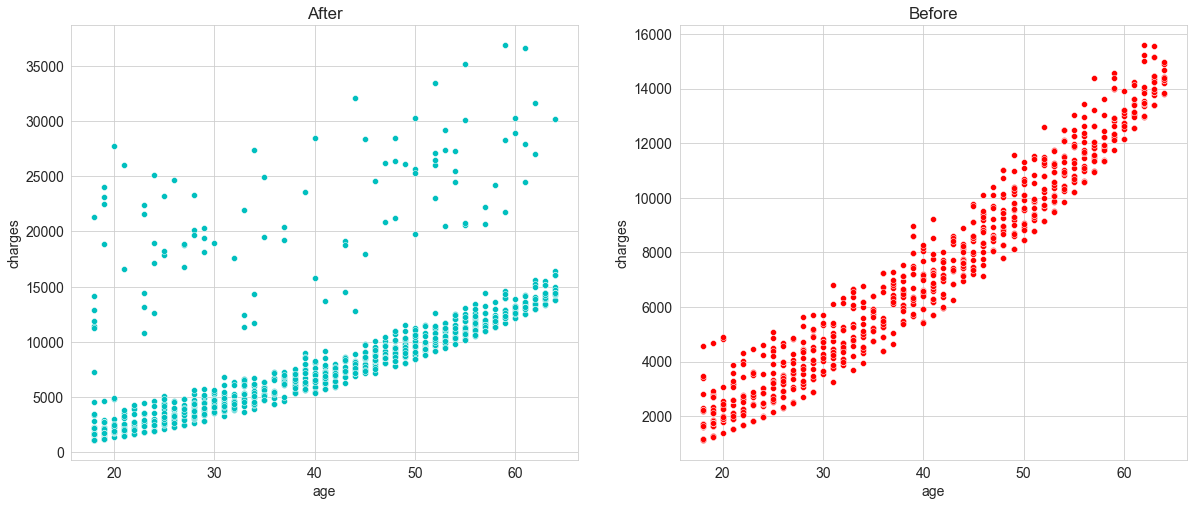

In [399]:
fig,(ax_1,ax_2)=plt.subplots(1,2,figsize=(20,8))

ax_1.set_title('After')
sns.scatterplot(x='age',y='charges',data=non_smoker_df,ax=ax_1,color='c')

ax_2.set_title('Before')
sns.scatterplot(x='age',y='charges',data=new_df,ax=ax_2,color='r')

plt.show()

# Transform The Columns to numeric

First I will clean the database so it will be only with numbers and without words using dictionris

In [400]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

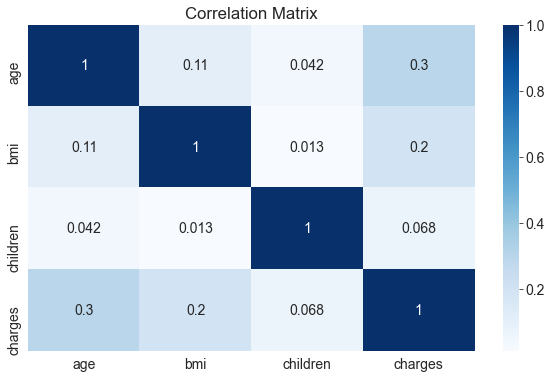

In [401]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

<AxesSubplot:title={'center':'Age vs. Charges'}, xlabel='age', ylabel='charges'>

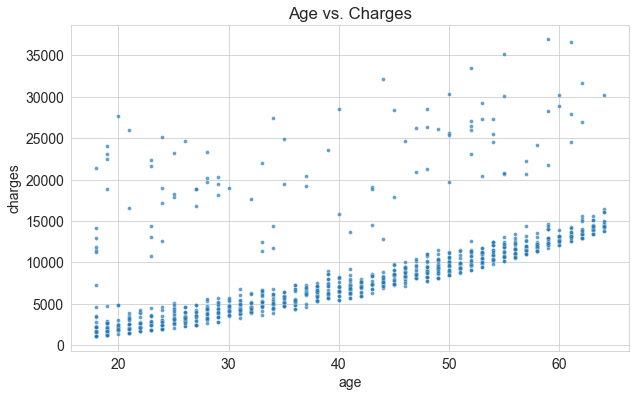

In [402]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

# Building Function to Estimate Charges

In [403]:
def estimate_charges(age, width, bmi):
    return width * age + bmi

I will send some data to the function to check

In [404]:
estimate_charges_ages = estimate_charges(non_smoker_df.age, 50, 100)
estimate_charges_ages

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [405]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

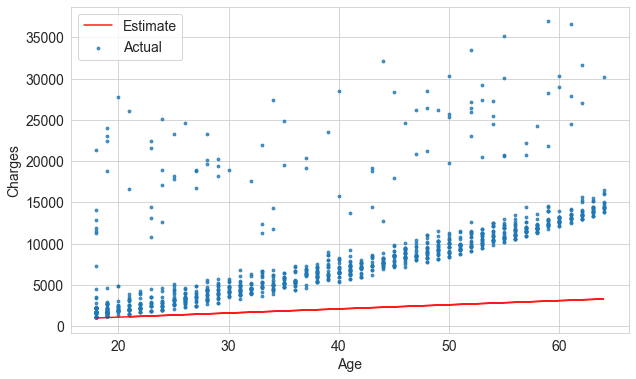

In [406]:
# not good estimate
plt.plot(non_smoker_df.age, estimate_charges_ages,'r', alpha=0.9)
plt.scatter(non_smoker_df.age, non_smoker_df.charges, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [407]:
sex_codes = {'female': 0, 'male': 1}
non_smoker_df['sex'] = non_smoker_df.sex.map(sex_codes)
enc = preprocessing.OneHotEncoder()
enc.fit(non_smoker_df[['region']])
enc.transform([['northeast']]).toarray()
one_hot = enc.transform(non_smoker_df[['region']]).toarray()
non_smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
non_smoker_df = non_smoker_df.drop(['region'], axis=1)

In [408]:
X=non_smoker_df.drop(['charges'],axis='columns')
y=np.log(non_smoker_df['charges'])
X.head()

,age,sex,bmi,children,northeast,northwest,southeast,southwest
1,18,1,33.770,1,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0.0,1.0,0.0,0.0
5,31,0,25.740,0,0.0,0.0,1.0,0.0


Copy the data:

# Splitting The Data

I will split my data into two parametrs:
* **X** - The data that I give to the model
* **y** - The data that I want to predict

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(y_train.shape)
print(X_train.shape)

(851,)
(851, 8)


# Creating Dummy Model

In [410]:
dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
my_mean_absolute_error = mean_absolute_error(y_test, y_predict)
my_mean_absolute_error

0.5849145956608087

# Finding Model

Try Linear regression:

In [411]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.7938471692131153


In [412]:

cross_val_score(model,X_test,y_test,cv=10).mean()

0.781455396611533

Try Polynomial Regression:

In [413]:
poly=PolynomialFeatures(degree=2)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)


poly.fit(X_train_poly,y_test)
lm_poly=LinearRegression()

lm_poly.fit(X_train_poly,y_train)
score = lm_poly.score(X_test_poly,y_test)
score

0.8038399116953666

I will try to find which model is better while using graphs:

In [414]:
test=pd.DataFrame({'True values':np.exp(y_test),
                   'Linnear Regression predictions':np.exp(model.predict(X_test)),
                   'Polynomial Regression predictions':np.exp(lm_poly.predict(X_test_poly))})

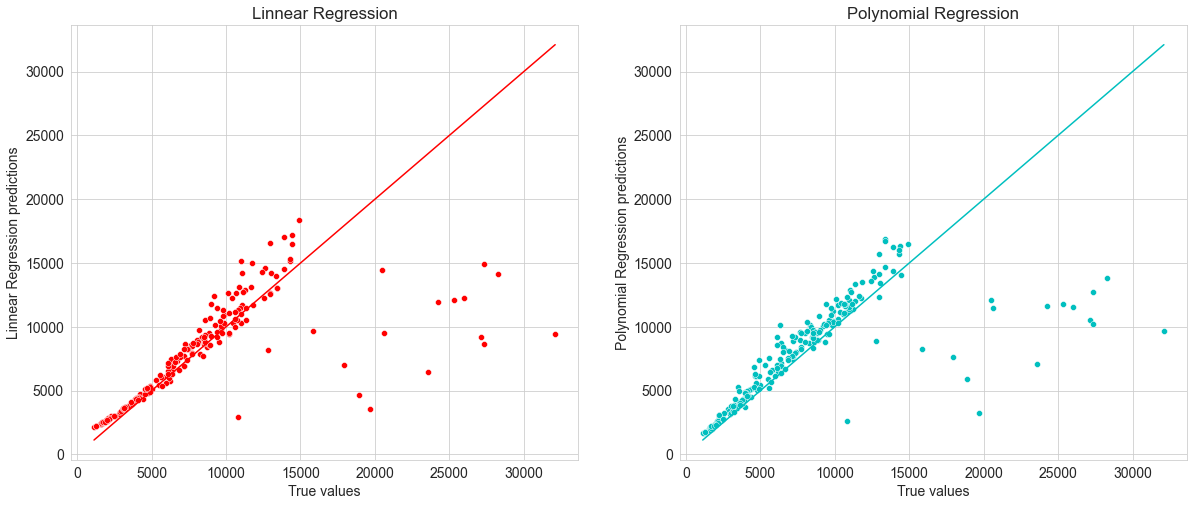

In [415]:
fig,(ax_1,ax_2)=plt.subplots(1,2,figsize=(20,8))

ax_1.set_title('Linnear Regression')
sns.scatterplot(x='True values',y='Linnear Regression predictions',data=test,ax=ax_1,color='r')
sns.lineplot(x='True values',y='True values',data=test,ax=ax_1,color='r')

ax_2.set_title('Polynomial Regression')
sns.scatterplot(x='True values',y='Polynomial Regression predictions',data=test,ax=ax_2,color='c')
sns.lineplot(x='True values',y='True values',data=test,ax=ax_2,color='c')


plt.show()

According to the data, the best model is: Polynomial Regression, with the score of: 0.804, and in another words: 80.4%

# Error Model

In [416]:
mean_squared_error(y_test,model.predict(X_test))

0.10814578154340462

# Conclusion

* The accuracy score of the chosen model is 80.4%.

* I have seen that there is a connection between the age, sex, bmi, children, region, that effect the charges for non smokers.